# Two-Level: Weak CW with Decay

## Define and Solve

In [20]:
mb_solve_json = """
{
  "atom": {
    "decays": [
      {
        "channels": [[0, 1]],
        "rate": 1.0
      }
    ],
    "fields": [
      {
        "coupled_levels": [[0, 1]],
        "detuning": 0.0,
        "rabi_freq": 1.0e-3,
        "rabi_freq_t_args": {
          "ampl": 1.0,
          "on": 0.0,
          "off": 8.0,
          "fwhm": 1.0
        },
        "rabi_freq_t_func": "ramp_onoff"
      }
    ],
    "num_states": 2
  },
  "t_min": -2.0,
  "t_max": 10.0,
  "t_steps": 100,
  "z_min": -0.2,
  "z_max": 1.2,
  "z_steps": 20,
  "interaction_strengths": [
    1.0
  ]
}
"""

In [21]:
from maxwellbloch import mb_solve
mbs = mb_solve.MBSolve().from_json_str(mb_solve_json)

In [22]:
Omegas_zt, states_zt = mbs.mbsolve()

10.0%. Run time:   0.16s. Est. time left: 00:00:00:01
20.0%. Run time:   0.53s. Est. time left: 00:00:00:02
30.0%. Run time:   0.88s. Est. time left: 00:00:00:02
40.0%. Run time:   1.30s. Est. time left: 00:00:00:01
50.0%. Run time:   1.84s. Est. time left: 00:00:00:01
60.0%. Run time:   2.20s. Est. time left: 00:00:00:01
70.0%. Run time:   2.55s. Est. time left: 00:00:00:01
80.0%. Run time:   2.86s. Est. time left: 00:00:00:00
90.0%. Run time:   3.17s. Est. time left: 00:00:00:00
Total run time:   3.50s
CPU times: user 3.43 s, sys: 64.1 ms, total: 3.5 s
Wall time: 3.55 s


## Field Output

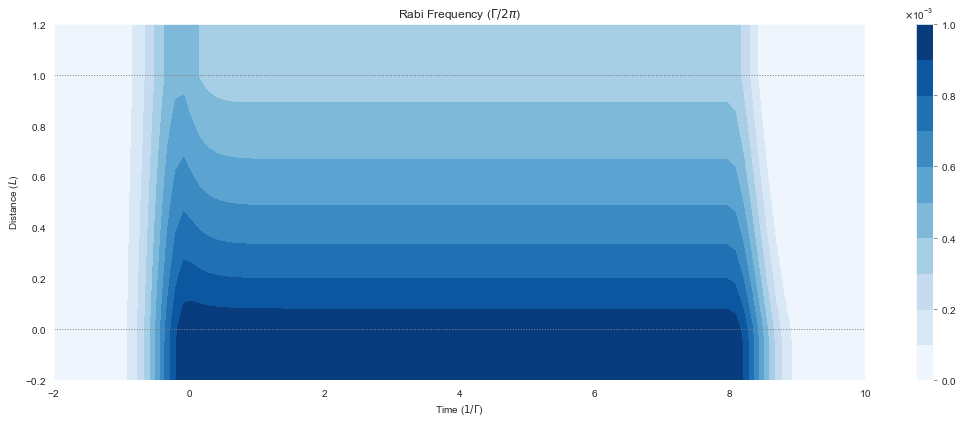

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
sns.set_style('darkgrid')

fig = plt.figure(1, figsize=(16, 6))
ax = fig.add_subplot(111)
cmap_range = np.linspace(0.0, 1.0e-3, 11)
cf = ax.contourf(mbs.tlist, mbs.zlist, 
                 np.abs(mbs.Omegas_zt[0]/(2*np.pi)), 
                 cmap_range, cmap=plt.cm.Blues)
ax.set_title('Rabi Frequency ($\Gamma / 2\pi $)')
ax.set_xlabel('Time ($1/\Gamma$)')
ax.set_ylabel('Distance ($L$)')
for y in [0.0, 1.0]:
    ax.axhline(y, c='grey', lw=1.0, ls='dotted')
plt.colorbar(cf);